In [1]:
import numpy as np
import pandas as pd
traffic=pd.read_excel('04월 서울시 교통량 조사자료.xlsx')
traffic_latlon=pd.read_excel('04월 서울시 교통량 조사자료-수집지점 좌표.xlsx')
charger=pd.read_excel('전기차 충전소 설치현황_20210522.xls')

In [2]:
traffic_latlon.drop(['검지기 유형', '주소', '도로명 주소', '유입 방향'], axis=1, inplace=True)

In [3]:
charger.drop(['시구', '급속충전기(대)', '완속충전기(대)', '지원차종'], axis=1, inplace=True)

In [4]:
null_locs = charger[charger['주소'] == '-'].index
charger.drop(null_locs, axis = 0, inplace = True)

In [5]:
charger['주소'][92]

'서울특별시 강북구 번동 139'

In [6]:
charger.head()

,설치장소,주소
0,LH강남힐스테이트,서울특별시 강남구 자곡동 자곡로3길 21
1,LH서울지사,서울특별시 강남구 선릉로 121길 12
2,가람아파트,서울특별시 강남구 일원동 일원로 127
3,강남구청 공영주차장,서울 강남구 삼성동 16-1
4,강남데시앙파크,서울특별시 강남구 세곡동 헌릉로590길 63


In [7]:
import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm

In [8]:
font_name = fm.FontProperties(fname = 'C:/Windows/Fonts/malgun.ttf').get_name()
matplotlib.rc('font', family = font_name)

In [9]:
seoul_area = gpd.GeoDataFrame.from_file('LARD_ADM_SECT_SGG_11.shp', encoding='cp949')


In [10]:
traffic_latlon['경도'] = traffic_latlon['경도'].astype(float)
traffic_latlon['위도'] = traffic_latlon['위도'].astype(float)
traffic_latlon['geometry'] = traffic_latlon.apply(lambda row : Point([row['경도'], row['위도']]), axis=1)
traffic_latlon = gpd.GeoDataFrame(traffic_latlon, geometry='geometry')
traffic_latlon.crs = {'init':'epsg:4326'}
traffic_latlon = traffic_latlon.to_crs({'init':'epsg:5179'})

C:\Users\yonpo\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [11]:
seoul_area.geometry.area.head()

0    2.453758e+07
1    3.383061e+07
2    3.946631e+07
3    4.685083e+07
4    2.954112e+07
dtype: float64

In [12]:
seoul_area.geometry.length.head()

0    24029.227412
1    30532.219899
2    35504.681042
3    43978.564653
4    27448.698426
dtype: float64

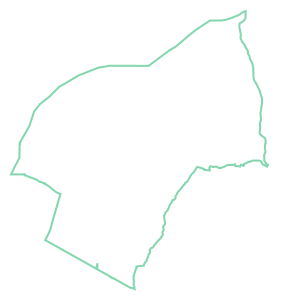

In [13]:
seoul_area.geometry[0].boundary

In [14]:
seoul_area.geometry.head(10)

0    POLYGON ((969713.132 1948846.288, 969692.451 1...
1    POLYGON ((968640.372 1944982.492, 968640.957 1...
2    POLYGON ((958696.114 1948605.678, 959195.920 1...
3    POLYGON ((958117.753 1940073.855, 958118.398 1...
4    POLYGON ((949321.250 1944035.054, 949323.256 1...
5    POLYGON ((947237.833 1943029.684, 947245.149 1...
6    POLYGON ((945060.841 1950575.575, 945060.701 1...
7    POLYGON ((944458.844 1943077.341, 944482.865 1...
8    POLYGON ((939273.809 1944348.583, 939285.784 1...
9    MULTIPOLYGON (((935035.249 1950923.294, 935041...
Name: geometry, dtype: geometry

In [15]:
seoul_area

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,GID,geometry
0,11740,강동구,337,11740,127,"POLYGON ((969713.132 1948846.288, 969692.451 1..."
1,11710,송파구,1969,11710,128,"POLYGON ((968640.372 1944982.492, 968640.957 1..."
2,11680,강남구,33,11680,129,"POLYGON ((958696.114 1948605.678, 959195.920 1..."
3,11650,서초구,33,11650,130,"POLYGON ((958117.753 1940073.855, 958118.398 1..."
4,11620,관악구,33,11620,131,"POLYGON ((949321.250 1944035.054, 949323.256 1..."
5,11590,동작구,689,11590,132,"POLYGON ((947237.833 1943029.684, 947245.149 1..."
6,11560,영등포구,481,11560,133,"POLYGON ((945060.841 1950575.575, 945060.701 1..."
7,11545,금천구,33,11545,134,"POLYGON ((944458.844 1943077.341, 944482.865 1..."
8,11530,구로구,33,11530,135,"POLYGON ((939273.809 1944348.583, 939285.784 1..."
9,11500,강서구,65,11500,136,"MULTIPOLYGON (((935035.249 1950923.294, 935041..."


In [16]:
seoul_area.geometry.centroid.head()

0    POINT (968820.295 1950182.074)
1    POINT (965998.688 1945219.460)
2    POINT (961369.995 1944245.952)
3    POINT (958548.929 1941666.568)
4    POINT (950951.582 1941050.947)
dtype: geometry

In [17]:
print(traffic_latlon['geometry'][0].xy)
print(traffic_latlon['geometry'][0].coords)
print(list(traffic_latlon['geometry'][0].coords))

(array('d', [951291.6503473723]), array('d', [1952278.6480787962]))
[(951291.6503473723, 1952278.6480787962)]


In [18]:
seoul_area.geometry.is_valid.head()

0     True
1    False
2     True
3     True
4     True
dtype: bool

In [19]:
print(traffic_latlon['geometry'][0].within(seoul_area.geometry[0]))

False


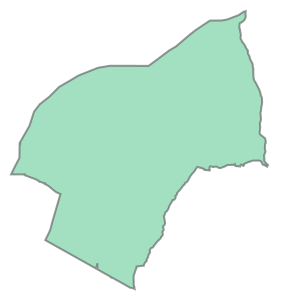

In [20]:
seoul_area.geometry[0]

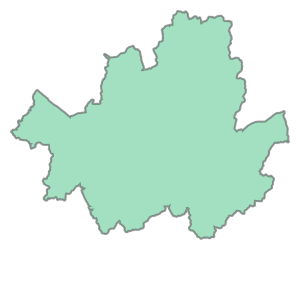

In [21]:
seoul_area.geometry.buffer(100).unary_union

In [22]:
print(traffic_latlon['geometry'][0].within(seoul_area.geometry.buffer(100).unary_union))

True


(좌표).within(seoul_area.geometry.buffer(100).unary_union))

서울 내부에 있는지 확인 가능

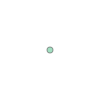

In [24]:
traffic_latlon['geometry'][0]

In [25]:
traffic_latlon.head()

,지점번호,지점명칭,위도,경도,유출방향,geometry
0,A-01,성산로(금화터널),37.568588,126.948436,[성산로]독립문역->봉원고가차도,POINT (951291.650 1952278.648)
1,A-02,사직로(사직터널),37.572298,126.962853,[사직로]사직단->독립문역,POINT (952567.171 1952682.880)
2,A-03,자하문로(자하문터널),37.588831,126.968548,[자하문로]청운초등학교->석파정,POINT (953080.449 1954514.280)
3,A-04,대사관로(삼청터널),37.596359,126.984209,[삼청로]삼청공원입구->삼청각,POINT (954467.687 1955341.770)
4,A-05,율곡로(안국역),37.576000,126.984342,[율곡로]안국동사거리->안국역,POINT (954467.028 1953082.968)
